# Question 1

In [1]:
import pandas as pd

In [79]:
df = pd.read_csv('tips.csv',header = None)
df.columns = ["obs","totbill","tip","sex","smoker","day","time","size"]

In [80]:
df.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,1,0,6,0,2
1,2,10.34,1.66,0,0,6,0,3
2,3,21.01,3.50,0,0,6,0,3
3,4,23.68,3.31,0,0,6,0,2
4,5,24.59,3.61,1,0,6,0,4


In [4]:
df.describe()

,obs,totbill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,122.500000,19.785943,2.998279,0.356557,0.381148,4.725410,0.278689,2.569672
std,70.580923,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,1.000000,3.070000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000
25%,61.750000,13.347500,2.000000,0.000000,0.000000,3.000000,0.000000,2.000000
50%,122.500000,17.795000,2.900000,0.000000,0.000000,5.000000,0.000000,2.000000
75%,183.250000,24.127500,3.562500,1.000000,1.000000,6.000000,1.000000,3.000000
max,244.000000,50.810000,10.000000,1.000000,1.000000,6.000000,1.000000,6.000000


In [5]:
#convert day numeric value to string value
def numtoday(x):
    if x is 3 :
        return "Thursday"
    if x is 4 :
        return "Friday"
    if x is 5 :
        return "Saturday"
    if x is 6 :
        return "Sunday"

In [6]:
df['sex'] = ["Male" if x is 0 else "Female" for x in df['sex']]

In [7]:
df['smoker'] = ["No" if x is 0 else "Yes" for x in df['smoker']]

In [8]:
df['time'] = ["Day" if x is 0 else "Night" for x in df['time']]

In [9]:
df['day'] = df['day'].apply(lambda x : numtoday(x))

In [10]:
#qualitative data
ql = df.iloc[:,3:7]
ql.head()

,sex,smoker,day,time
0,Female,No,Sunday,Day
1,Male,No,Sunday,Day
2,Male,No,Sunday,Day
3,Male,No,Sunday,Day
4,Female,No,Sunday,Day


In [11]:
ql.describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Saturday,Day
freq,157,151,87,176


,frequency,percentage
Male,157,0.643443
Female,87,0.356557


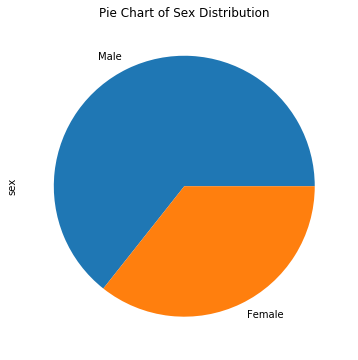

In [66]:
ql['sex'].value_counts().plot(kind='pie', figsize = (6,6),title= "Pie Chart of Sex Distribution")
df = pd.DataFrame(data=ql['sex'].value_counts())
df = df.rename(columns = {'sex':'frequency'})
df['percentage'] = df['frequency']/df['frequency'].sum()
df.head()

,frequency,percentage
No,151,0.618852
Yes,93,0.381148


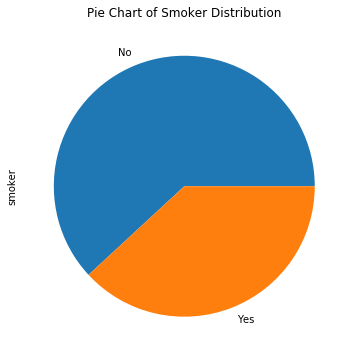

In [67]:
ql['smoker'].value_counts().plot(kind='pie', figsize = (6,6),title= "Pie Chart of Smoker Distribution")
df = pd.DataFrame(data=ql['smoker'].value_counts())
df = df.rename(columns = {'smoker':'frequency'})
df['percentage'] = df['frequency']/df['frequency'].sum()
df.head()

,frequency,percentage
Saturday,87,0.356557
Sunday,76,0.311475
Thursday,62,0.254098
Friday,19,0.077869


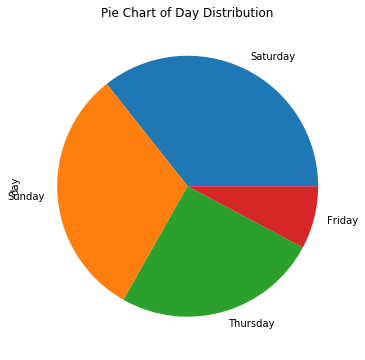

In [68]:
ql['day'].value_counts().plot(kind='pie', figsize = (6,6),title= "Pie Chart of Day Distribution")
df = pd.DataFrame(data=ql['day'].value_counts())
df = df.rename(columns = {'day':'frequency'})
df['percentage'] = df['frequency']/df['frequency'].sum()
df.head()

,frequency,percentage
Day,176,0.721311
Night,68,0.278689


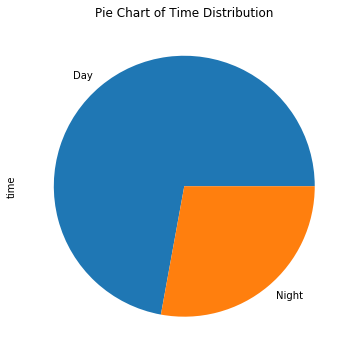

In [69]:
ql['time'].value_counts().plot(kind='pie',figsize = (6,6),title= "Pie Chart of Time Distribution")
df = pd.DataFrame(data=ql['time'].value_counts())
df = df.rename(columns = {'time':'frequency'})
df['percentage'] = df['frequency']/df['frequency'].sum()
df.head()

# Question 2

In [17]:
#quantitative data
qt = df.iloc[:,[1,2,7]]
qt.head()

,totbill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [70]:
qt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
totbill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


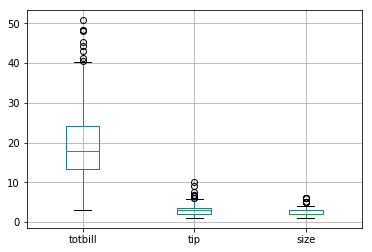

In [19]:
boxplot = qt.boxplot()

# Question3

In [20]:
df.groupby(['sex'])['totbill'].sum()

sex
Female    1570.95
Male      3256.82
Name: totbill, dtype: float64

In [21]:
df.groupby(['sex','day'])['totbill'].sum()

sex     day     
Female  Friday       127.31
        Saturday     551.05
        Sunday       357.70
        Thursday     534.89
Male    Friday       198.57
        Saturday    1227.35
        Sunday      1269.46
        Thursday     561.44
Name: totbill, dtype: float64

In [83]:
#contingency table of day and sex
table_ds = pd.crosstab(df['sex'],df['day'])
table_ds = table_ds.transpose() 
table_ds['sum'] = table_ds[table_ds.columns].sum(axis=1)
table_ds

sex,0,1,sum
day,,,
3,30,32,62
4,10,9,19
5,59,28,87
6,58,18,76


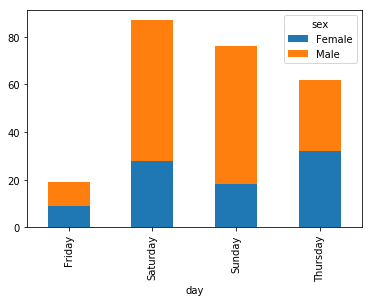

In [35]:
table_ds.plot(kind='bar', stacked=True)

In [85]:
#contingency table of smoker and sex
table_ss = pd.crosstab(df['sex'],df['smoker'],)
table_ss = table_ss.transpose()
table_ss['sum'] = table_ss[table_ss.columns].sum(axis=1)
table_ss

sex,0,1,sum
smoker,,,
0,97,54,151
1,60,33,93


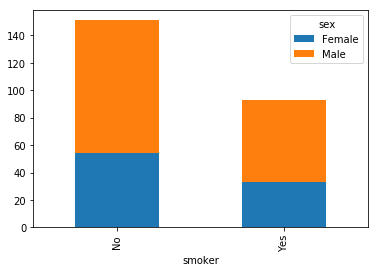

In [38]:
table_ss.plot(kind='bar', stacked=True)

# Question 4

In [53]:
df.loc[:,['smoker','sex']]

,smoker,sex
0,No,Female
1,No,Male
2,No,Male
3,No,Male
4,No,Female
5,No,Male
6,No,Male
7,No,Male
8,No,Male
9,No,Male


In [54]:
#contingency table of tip and sex,smoker
table_tss = pd.crosstab(df['tip'],df.loc[:,['smoker','sex']])
table_tss = table_tss.transpose()
table_tss

ValueError: Shape of passed values is (2, 2), indices imply (244, 2)

In [40]:
df.groupby(['sex','smoker','day'])['tip'].sum()

sex     smoker  day     
Female  No      Friday        6.25
                Saturday     35.42
                Sunday       46.61
                Thursday     61.49
        Yes     Friday       18.78
                Saturday     43.03
                Sunday       14.00
                Thursday     20.93
Male    No      Friday        5.00
                Saturday    104.21
                Sunday      133.96
                Thursday     58.83
        Yes     Friday       21.93
                Saturday     77.74
                Sunday       52.82
                Thursday     30.58
Name: tip, dtype: float64

# Question 5

Male smoker turn to be the most generous i

In [ ]:
male = df.iloc[0,:]
male

In [ ]:
female = df.iloc[1,:]
female

In [ ]:
import seaborn as sns
g = sns.catplot(x="day", y="sex", hue="sex", data=df,
                height=6, kind="bar", palette="muted")

In [ ]:
table.plot(kind='pie')

In [ ]:

sns.set()
df.set_index('App').T.plot(kind='bar', stacked=True)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

From the correlation matrix above, we indentify a strong correlation between the total bill and the amount of tip given. There is also a subtle relation between the size of the party and the amount of tip given.

In [ ]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

# Question 7